# Lyapunov Stability Investigation for Neural network based integrator

In [ ]:
import sys
sys.path.append('..')

import numpy as np
from matplotlib import pyplot as plt
from Code.dynamical_system import *
from Code.time_integrator import *
from Code.neuralnet import *

np.random.seed(2512517)

## Neural network integrator


Set system parameters, construct dynamical system and integrator.

The model system we are using here is the double well oscillator. We investigate whether the trajectory of the system as generated by the network matches the Lyapunov stability characteristics of the 'true' system, as simulated using the Verlet timestepper.

The timestep size of the Neural network integrator is set to $\Delta t=\Delta t_{\text{Verlet}}$ where $\Delta t_{\text{Verlet}}$ is the step size of the Verlet integrator that is used for training.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 2)]       0           []                               
                                                                                                  
 flatten (Flatten)              (None, 8)            0           ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 64)           576         ['flatten[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           4160        ['dense[0][0]']                  
                                                                                              

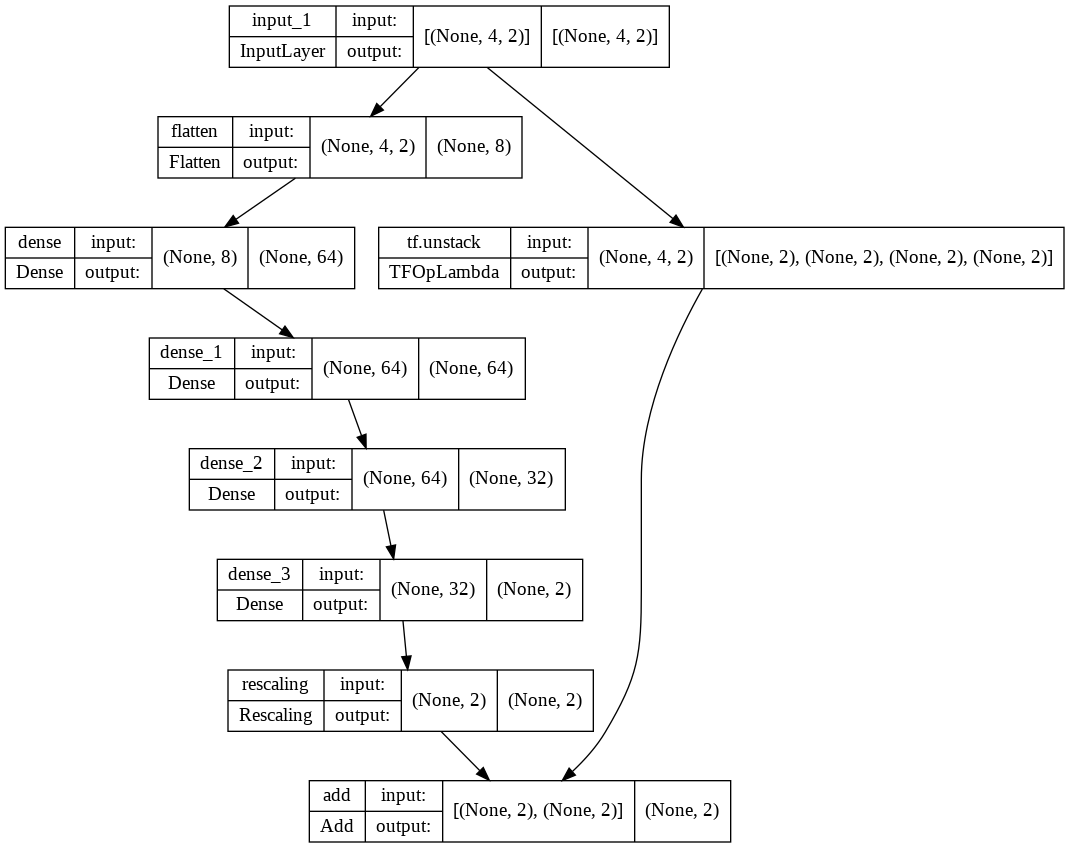

In [ ]:
# mass of particle
mass = 1.2
# timestep for Verlet integrator
dt_verlet = 0.005
# timestep for neural network integrator

# number of steps for neural network integrator
nsteps = 4

doublewell = DoubleWell(mass)

verlet_DW = VerletIntegrator(doublewell,dt_verlet)

nn_integrator_1 = NN5LR3Integrator(doublewell,nsteps,dt_verlet)

# visualise the neural network model
nn_integrator_1.model.summary()
keras.utils.plot_model(nn_integrator_1.model, show_shapes=True)

In [ ]:
BATCH_SIZE=64

data_generator_1 = DataGenerator(nn_integrator_1,verlet_DW)
train_batches_1 = data_generator_1.dataset.batch(BATCH_SIZE)




## Train neural network based integrator



In [ ]:
EPOCHS=300
STEPS_PER_EPOCH=100
log_dir = './tb_logs/'
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

result_1 = nn_integrator_1.model.fit(train_batches_1,epochs=EPOCHS,steps_per_epoch=STEPS_PER_EPOCH,
                                 callbacks=tensorboard_cb)



Epoch 1/300
100/100 [==============================] - 5s 20ms/step - loss: 0.0013
Epoch 2/300
100/100 [==============================] - 2s 21ms/step - loss: 0.0011
Epoch 3/300
100/100 [==============================] - 2s 20ms/step - loss: 9.8886e-04
Epoch 4/300
100/100 [==============================] - 2s 21ms/step - loss: 8.5716e-04
Epoch 5/300
100/100 [==============================] - 2s 21ms/step - loss: 5.2363e-04
Epoch 6/300
100/100 [==============================] - 2s 21ms/step - loss: 6.6910e-04
Epoch 7/300
100/100 [==============================] - 2s 20ms/step - loss: 4.8088e-04
Epoch 8/300
100/100 [==============================] - 2s 20ms/step - loss: 6.2710e-04
Epoch 9/300
100/100 [==============================] - 2s 20ms/step - loss: 5.1614e-04
Epoch 10/300
100/100 [==============================] - 2s 20ms/step - loss: 4.7431e-04
Epoch 11/300
100/100 [==============================] - 2s 21ms/step - loss: 5.7484e-04
Epoch 12/300
100/100 [===========================

## Visualise Loss function

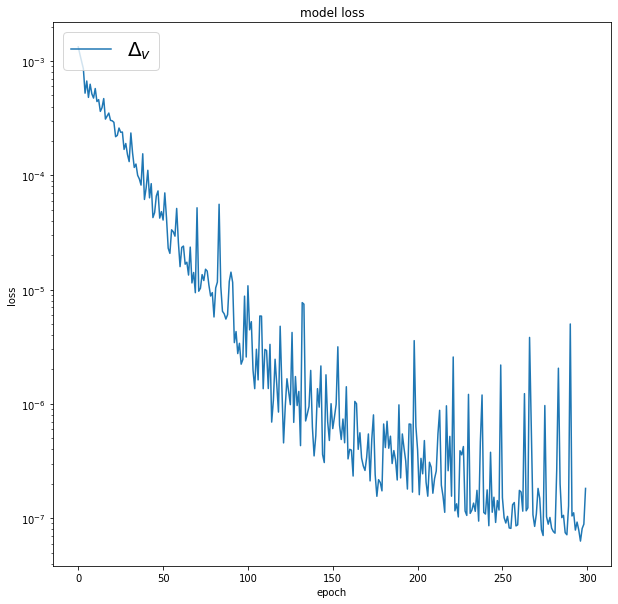

In [ ]:
#print(result.history.keys())

plt.rcParams['figure.figsize'] = [10, 10]

# summarize history for loss
plt.plot(result_1.history['loss'])


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.legend(['$\Delta_v$'], loc='upper left')
plt.yscale("log")
plt.show()

## Plot trajectories to $t=64$ generated by Verlet integrator and neural network with velocity perturbations $0.0, 0.1, 0.2$

In [ ]:
# Final time
T_final = 64





# Initialise NN for each perturbation scenario
x_initial_1 = np.zeros((nn_integrator_1.nsteps,nn_integrator_1.dynamical_system.dim))
v_initial_1 = np.zeros((nn_integrator_1.nsteps,nn_integrator_1.dynamical_system.dim))
x_initial_2 = np.zeros((nn_integrator_1.nsteps,nn_integrator_1.dynamical_system.dim))
v_initial_2 = np.zeros((nn_integrator_1.nsteps,nn_integrator_1.dynamical_system.dim))
x_initial_3 = np.zeros((nn_integrator_1.nsteps,nn_integrator_1.dynamical_system.dim))
v_initial_3 = np.zeros((nn_integrator_1.nsteps,nn_integrator_1.dynamical_system.dim))


# Timestepping loop
t_nn_1 = []
x_nn_1 = []
v_nn_1 = []
E_nn_1 = []
t_nn_2 = []
x_nn_2 = []
v_nn_2 = []
E_nn_2 = []
t_nn_3 = []
x_nn_3 = []
v_nn_3 = []
E_nn_3 = []


# ==== Verlet integrator ====


# Initial conditions for verlet 1 (unperturbed)
x = np.zeros(1)
v = np.zeros(1)
x[0] = 2.4
v[0] = 0.5
verlet_DW.set_state(x,v)



t = 0.0
t_verlet_DW_1 = []
x_verlet_DW_1 = []
v_verlet_DW_1 = []
E_verlet_DW_1 = []



while t<T_final:
    t_verlet_DW_1.append(t)
    E_verlet_DW_1.append(verlet_DW.energy())
    x_verlet_DW_1.append(verlet_DW.x[0])
    v_verlet_DW_1.append(verlet_DW.v[0])
    verlet_DW.integrate(1)
    t += dt_verlet


verlet_DW.set_state(x,v)
for k in range(nn_integrator_1.nsteps):    
    x_initial_1[k,:] = verlet_DW.x[:]
    v_initial_1[k,:] = verlet_DW.v[:]
    verlet_DW.integrate(int(dt_verlet/dt_verlet))

nn_integrator_1.set_state(x_initial_1,v_initial_1)
t_1 = (nn_integrator_1.nsteps-1)*nn_integrator_1.dt

while t_1<T_final:
    t_nn_1.append(t_1)
    x_nn_1.append(nn_integrator_1.x[0])
    v_nn_1.append(nn_integrator_1.v[0])
    E_nn_1.append(nn_integrator_1.energy())
    nn_integrator_1.integrate(1)
    t_1 += dt_verlet


# Initial conditions for verlet 2 (perturbation 0.2)
x = np.zeros(1)
v = np.zeros(1)
x[0] = 2.4
v[0] = 0.7
verlet_DW_2 = VerletIntegrator(doublewell,dt_verlet)
verlet_DW_2.set_state(x,v)




# ==== Verlet integrator ====
t = 0.0
t_verlet_DW_2 = []
x_verlet_DW_2 = []
v_verlet_DW_2 = []
E_verlet_DW_2 = []



while t<T_final:
    t_verlet_DW_2.append(t)
    E_verlet_DW_2.append(verlet_DW_2.energy())
    x_verlet_DW_2.append(verlet_DW_2.x[0])
    v_verlet_DW_2.append(verlet_DW_2.v[0])
    verlet_DW_2.integrate(1)
    t += dt_verlet 

verlet_DW_2.set_state(x,v)
for k in range(nn_integrator_1.nsteps):    
    x_initial_2[k,:] = verlet_DW_2.x[:]
    v_initial_2[k,:] = verlet_DW_2.v[:]
    verlet_DW_2.integrate(int(dt_verlet/dt_verlet))

nn_integrator_1.set_state(x_initial_2,v_initial_2)
t_2 = (nn_integrator_1.nsteps-1)*nn_integrator_1.dt

while t_2<T_final:
    t_nn_2.append(t_2)
    x_nn_2.append(nn_integrator_1.x[0])
    v_nn_2.append(nn_integrator_1.v[0])
    E_nn_2.append(nn_integrator_1.energy())
    nn_integrator_1.integrate(1)
    t_2 += dt_verlet

# Initial conditions for verlet 2 (perturbation 0.1)
x = np.zeros(1)
v = np.zeros(1)
x[0] = 2.4
v[0] = 0.6
verlet_DW_3 = VerletIntegrator(doublewell,dt_verlet)
verlet_DW_3.set_state(x,v)

# ==== Verlet integrator ====
t = 0.0
t_verlet_DW_3 = []
x_verlet_DW_3 = []
v_verlet_DW_3 = []
E_verlet_DW_3 = []



while t<T_final:
    t_verlet_DW_3.append(t)
    E_verlet_DW_3.append(verlet_DW_3.energy())
    x_verlet_DW_3.append(verlet_DW_3.x[0])
    v_verlet_DW_3.append(verlet_DW_3.v[0])
    verlet_DW_3.integrate(1)
    t += dt_verlet 


verlet_DW_3.set_state(x,v)
for k in range(nn_integrator_1.nsteps):    
    x_initial_3[k,:] = verlet_DW_3.x[:]
    v_initial_3[k,:] = verlet_DW_3.v[:]
    verlet_DW_3.integrate(int(dt_verlet/dt_verlet))

nn_integrator_1.set_state(x_initial_3,v_initial_3)
t_3 = (nn_integrator_1.nsteps-1)*nn_integrator_1.dt

while t_3<T_final:
    t_nn_3.append(t_3)
    x_nn_3.append(nn_integrator_1.x[0])
    v_nn_3.append(nn_integrator_1.v[0])
    E_nn_3.append(nn_integrator_1.energy())
    nn_integrator_1.integrate(1)
    t_3 += dt_verlet


x_nn_1 = np.array(x_nn_1)
x_nn_2 = np.array(x_nn_2)
x_nn_3 = np.array(x_nn_3)
v_nn_1 = np.array(v_nn_1)
v_nn_2 = np.array(v_nn_2)
v_nn_3 = np.array(v_nn_3)



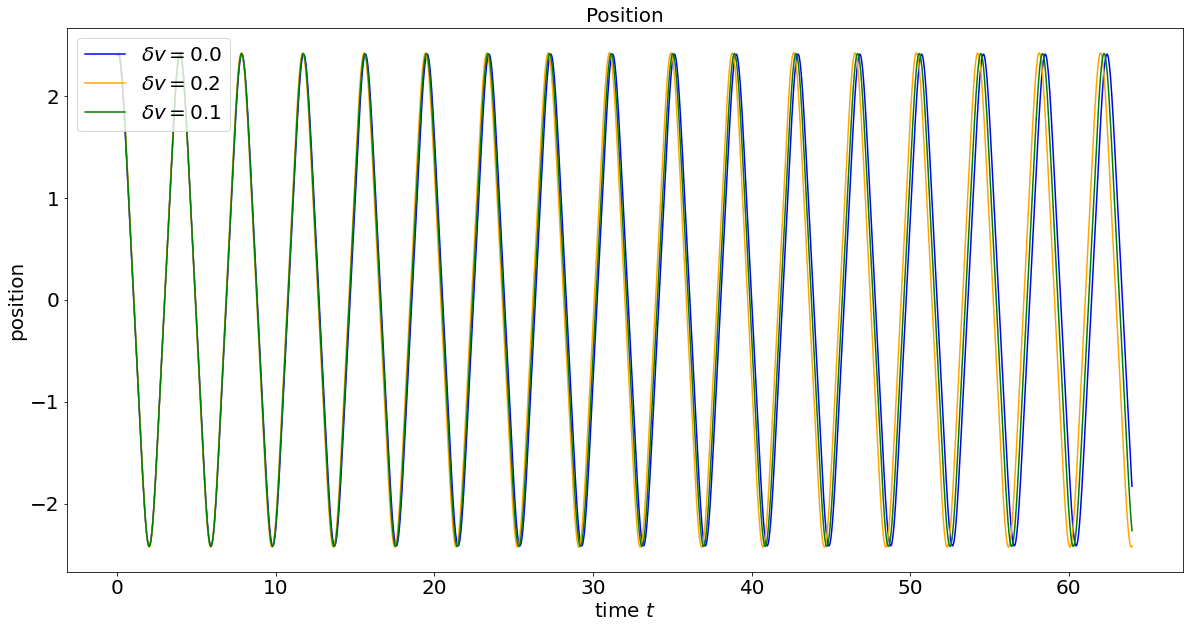

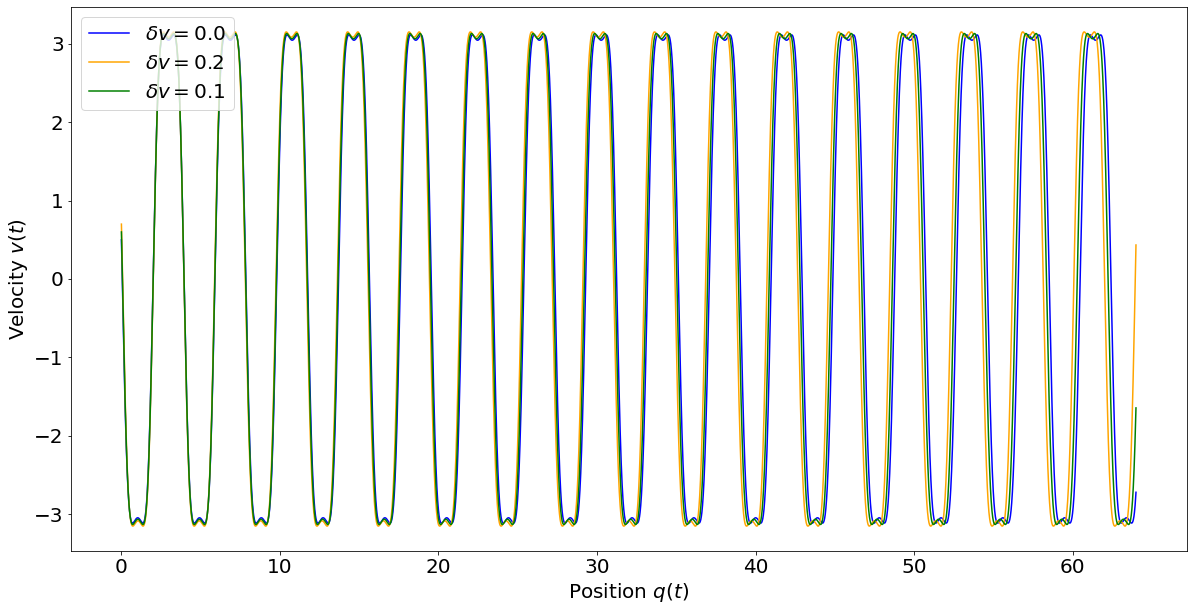

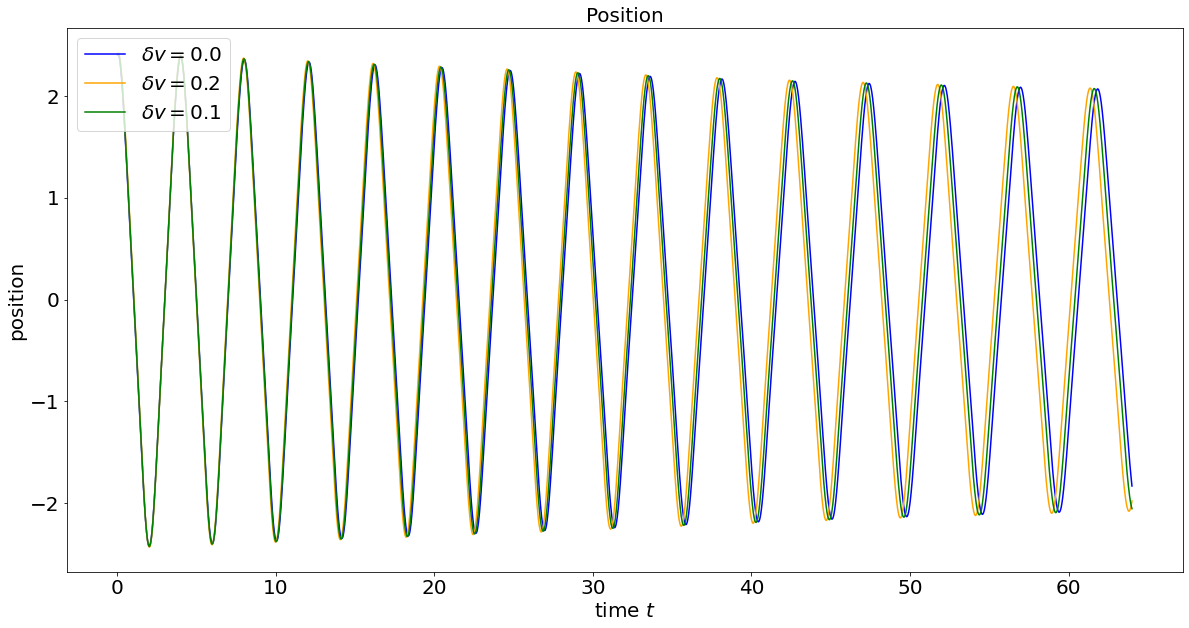

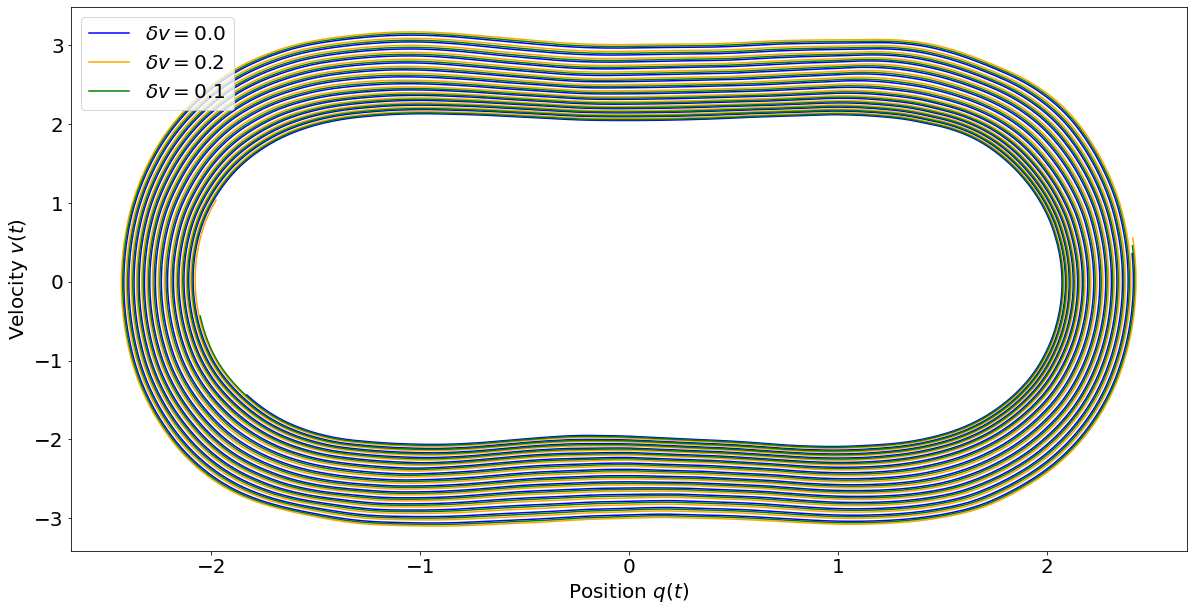

In [ ]:
# Plot position for the verlet as a function of time

plt.rcParams['figure.figsize'] = [20, 10]

plt.plot(t_verlet_DW_1,x_verlet_DW_1,label='$\delta v = 0.0$',color='blue')
plt.plot(t_verlet_DW_2,x_verlet_DW_2,label='$\delta v = 0.2$',color='orange')
plt.plot(t_verlet_DW_3,x_verlet_DW_3,label='$\delta v = 0.1$',color='green')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('position')
ax.set_title('Position')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
#plt.grid()
plt.show()


#subplots of position versus velocity for all 3 verlet scenarios

plt.rcParams['figure.figsize'] = [20, 10]

plt.clf()
plt.plot(t_verlet_DW_1,v_verlet_DW_1,label='$\delta v = 0.0$',color='blue')
plt.plot(t_verlet_DW_2,v_verlet_DW_2,label='$\delta v = 0.2$',color='orange')
plt.plot(t_verlet_DW_3,v_verlet_DW_3,label='$\delta v = 0.1$',color='green')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_ylabel('Velocity $v(t)$')
ax.set_xlabel('Position $q(t)$')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.show()


# Plot position for the neural network as a function of time

plt.rcParams['figure.figsize'] = [20, 10]

plt.plot(t_nn_1,x_nn_1,label='$\delta v = 0.0$',color='blue')
plt.plot(t_nn_2,x_nn_2,label='$\delta v = 0.2$',color='orange')
plt.plot(t_nn_3,x_nn_3,label='$\delta v = 0.1$',color='green')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('position')
ax.set_title('Position')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
#plt.grid()
plt.show()


#subplots of position versus velocity for all 3 neural networks

plt.rcParams['figure.figsize'] = [20, 10]

plt.clf()
plt.plot(x_nn_1,v_nn_1,label='$\delta v = 0.0$',color='blue')
plt.plot(x_nn_2,v_nn_2,label='$\delta v = 0.2$',color='orange')
plt.plot(x_nn_3,v_nn_3,label='$\delta v = 0.1$',color='green')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_ylabel('Velocity $v(t)$')
ax.set_xlabel('Position $q(t)$')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.show()